# Hands On Machine Learning
## Training Linear Models

## The Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

[0, 2, 0, 15]

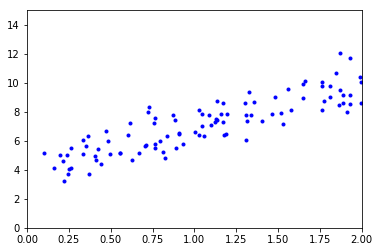

In [3]:
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.00361774],
       [2.9564421 ]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.00361774],
       [9.91650195]])

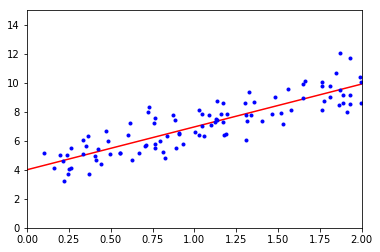

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

/Users/seb/anaconda3/envs/hands-machine-learning/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(array([4.00361774]), array([[2.9564421]]))

In [9]:
lin_reg.predict(X_new)

array([[4.00361774],
       [9.91650195]])

### Batch Gradient Descent

In [10]:
eta = 0.1
n_iterations = 1000
m = 100

In [11]:
theta = np.random.randn(2, 1)

In [12]:
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.00361774],
       [2.9564421 ]])

### Stochastic Gradient Descent

In [14]:
n_epochs = 50
t0, t1 = 5, 50

In [15]:
def learning_schedule(t):
    return t0 / (t + t1)

In [16]:
theta = np.random.randn(2, 1)

In [17]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [18]:
theta

array([[4.01610103],
       [2.9281506 ]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/Users/seb/anaconda3/envs/hands-machine-learning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.05347975]), array([3.0048861]))